In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14
%matplotlib inline

# Expectation Maximization (EM) in 1d

here we draw a few samples from two normal distributions, and then fit back two normal distributions via the EM algorithm

In [3]:
g1 = {'loc': 0, 'scale': 0.5}
g2 = {'loc': 2, 'scale': 1}

In [4]:
x1 = stats.norm(**g1).rvs(20)
x2 = stats.norm(**g2).rvs(20)

In [5]:
def E(x, c1, c2, e1, e2):
    ''' Expectation Step '''
    p1 = stats.norm(**c1).pdf(x)
    p2 = stats.norm(**c2).pdf(x)
    
    e1[:] = p1 / (p1 + p2)
    e2[:] = p2 / (p1 + p2)

In [6]:
def M(x, c1, c2, e1, e2):
    ''' Maximization Step '''
    c1['loc'] = np.average(x, weights=e1)
    c2['loc'] = np.average(x, weights=e2)
    
    c1['scale'] = np.sqrt(np.average(np.square(x-c1['loc']), weights=e1))
    c2['scale'] = np.sqrt(np.average(np.square(x-c2['loc']), weights=e2))

In [7]:
def plot(x, c1, c2, e1, e2):
    xspace = np.linspace(-5, 5, 1000)
    plt.plot(xspace, stats.norm(**c1).pdf(xspace), c='b')
    plt.plot(xspace, stats.norm(**c2).pdf(xspace), c='r')
    
    plt.plot(xspace, stats.norm(**g1).pdf(xspace), c='k', ls='--', alpha=0.5)
    plt.plot(xspace, stats.norm(**g2).pdf(xspace), c='k', ls='--', alpha=0.5)
    
    plt.scatter(x, np.zeros_like(x), s=50, c=e1, cmap='RdBu', edgecolor=None)

In [8]:
x = np.concatenate([x1, x2])

In [9]:
#random clusters init:

c1 = {}
c2 = {}

c1['loc'] = np.random.rand() * 2
c2['loc'] = np.random.rand() * 2
c1['scale'] = np.random.rand()
c2['scale'] = np.random.rand()

e1 = np.random.rand(x.size)
e2 = np.random.rand(x.size)

E(x, c1, c2, e1, e2)

This is how it looks like after random initialization

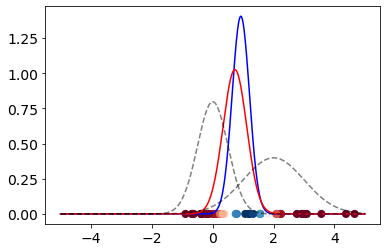

In [10]:
plot(x, c1, c2, e1, e2)

After 3 iterations

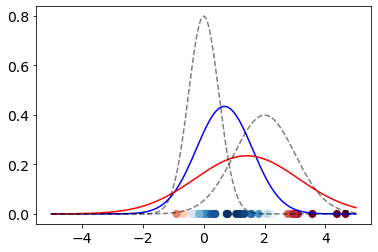

In [11]:
for i in range(3):
    E(x, c1, c2, e1, e2)
    M(x, c1, c2, e1, e2)

plot(x, c1, c2, e1, e2)

After aother 3 iterations

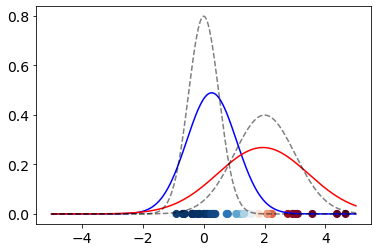

In [12]:
for i in range(3):
    E(x, c1, c2, e1, e2)
    M(x, c1, c2, e1, e2)

plot(x, c1, c2, e1, e2)

And aother 3 iterations

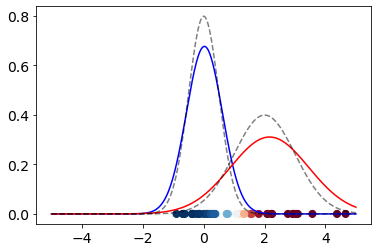

In [13]:
for i in range(3):
    E(x, c1, c2, e1, e2)
    M(x, c1, c2, e1, e2)

plot(x, c1, c2, e1, e2)

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

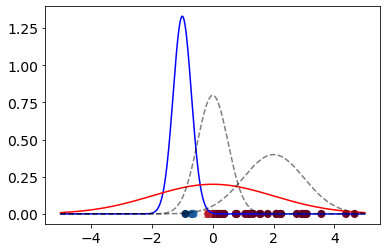

In [15]:
#random clusters init:

c1 = {}
c2 = {}

c1['loc'] = -1
c2['loc'] = 0
c1['scale'] = 0.3
c2['scale'] = 2

e1 = np.random.rand(x.size)
e2 = np.random.rand(x.size)

E(x, c1, c2, e1, e2)

plot(x, c1, c2, e1, e2)

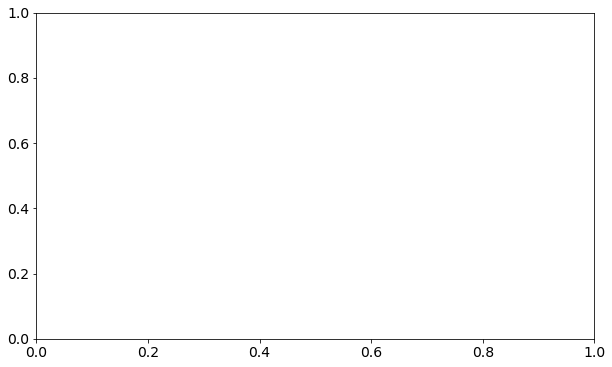

In [16]:
filenames = []


fig, ax = plt.subplots(1, 1, figsize=(10,6))

for i in range(20):

    plot(x, c1, c2, e1, e2)
    E(x, c1, c2, e1, e2)
    M(x, c1, c2, e1, e2)
    
    plt.ylim(-0.1,1)
    plt.xlim(-3,5)
    ax.set_title("Interation %i"%i)
    
    # create file name and append it to a list
    filename = f'{i}.jpg'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename, bbox_inches='tight', )
    plt.cla()


In [17]:
    

# build gif
with imageio.get_writer('mygif.gif', mode='I', fps=2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)